### Importing necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import  graphviz_layout
import networkx as nx
plt.rcParams['figure.figsize'] = [25, 20]     


def genData(param, show = False):
	a=[]
	if param[0]=="normal":
		mu, sigma, s = param[1],   param[2], param[3]
		a= np.random.normal(mu, sigma, size=s)
	elif param[0]=='uniform':
		mi, ma,s=param[1],   param[2], param[3]
		a= np.random.uniform(mi, ma, s)
	elif param[0]=="poisson":
		rate,s=param[1],   param[2]
		a = np.random.poisson(rate, s)
	if(show):
		count, bins, ignored = plt.hist(s, 14, density=True)
	return a

# Build a modular dynamic learning system
1. Modules process data at different levels of abstraction
2. Will be able to cope with new unseen data 
3. Take the best choise to minimize energy and maximize entripy

### Input Data Generation

In [4]:
############# input sensor data generation ############

d =  [ [0,0,1,0, 0,1,0,1, 0, 0 ],  [1,0,0,0, 0,0,0,1, 0 ,0] , [0,0,1,1, 0,0,0,0, 1,1] , [0,1,1,0, 0,1,1,0, 0,1] ] 
p=[10, 10, 10, 10]
pp=[p[0]]
for i in range(0,len(p)-1):
    pp.append(pp[i]+p[i+1])
print(pp)

N =1000
inputChargeSensor = []
da = genData( [ "uniform", 0,100, N])
#print(da)
for i in range(N):
    assigned = 0
    for j in range(len(pp)):
        if(da[i]<pp[j]) : 
            inputChargeSensor.append(d[j])
            assigned = 1
            break
    if (assigned==0):
        #print("Not assigned "+ str(i))
        da1 = genData( [ "uniform", 0,1, 4])
        da1 = da1<0.5
        da1 = [int(val) for val in da1]
        #print(da1)
        inputChargeSensor.append(da1)
#print(inputChargeSensor)
        

[10, 20, 30, 40]


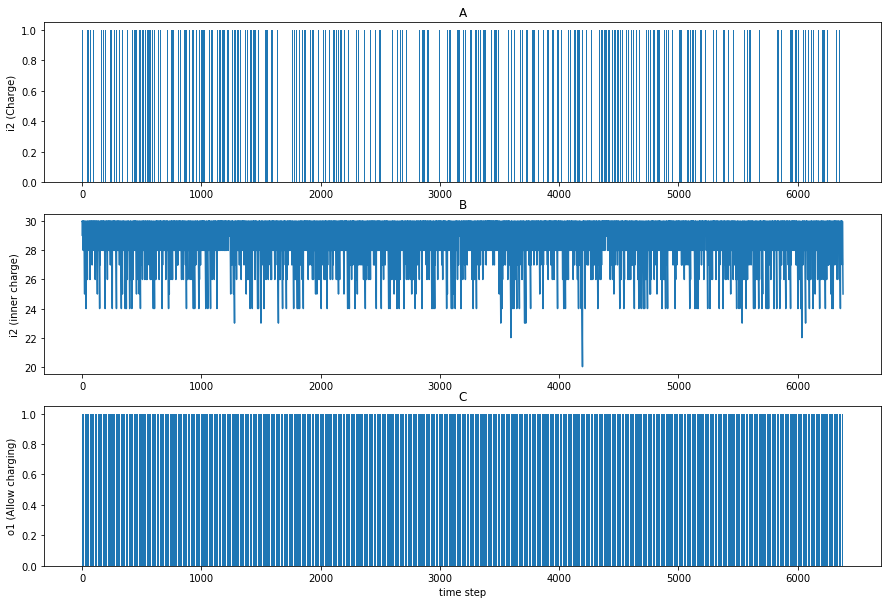

In [5]:
plt.rcParams['figure.figsize'] = [15, 10]    
#inputChargeSensor =d1*10
data1= inputChargeSensor
data1 = [val for sublist in data1 for val in sublist]
############# input inner sensor data generation ##########
window = 32
energy_capacity = 30
actual_energy = energy_capacity
energy=[]
for i in range(len(data1)):    
    energy.append(actual_energy)
    if(data1[i]==1):
        actual_energy = energy_capacity
    else:
        actual_energy = actual_energy-1


############# input data plot ############
plt.subplot(3, 1, 1)
plt.bar(range(0,len(data1)),data1)
plt.ylabel('i2 (Charge)')
plt.title('A')

    
plt.subplot(3, 1, 2)
plt.plot(energy)
plt.title('B')

plt.ylabel('i2 (inner charge)')

plt.subplot(3, 1, 3)
plt.bar(range(0,len(data1)),np.ones(len(energy)))
#plt.title('Energy Level')
plt.xlabel('time step')
plt.ylabel('o1 (Allow charging)')
plt.title('C')

plt.show()


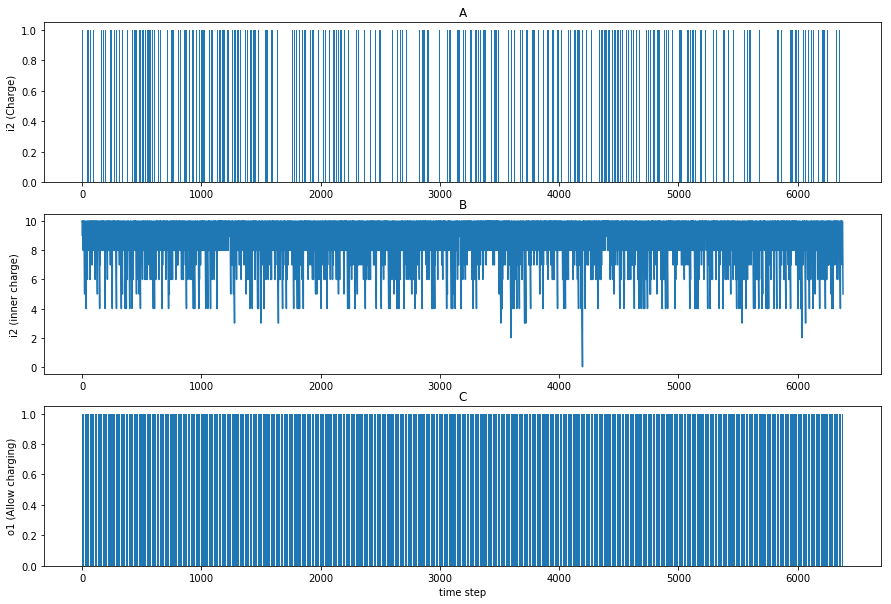

In [6]:
plt.rcParams['figure.figsize'] = [15, 10]    
#inputChargeSensor =d1*10
data1= inputChargeSensor
data1 = [val for sublist in data1 for val in sublist]
############# input inner sensor data generation ##########
actual_energy = 10
energy=[]
for i in range(len(data1)):    
    energy.append(actual_energy)
    if(data1[i]==1):
        actual_energy =10
    else:
        actual_energy = actual_energy-1


############# input data plot ############
plt.subplot(3, 1, 1)
plt.bar(range(0,len(data1)),data1)
plt.ylabel('i2 (Charge)')
plt.title('A')

    
plt.subplot(3, 1, 2)
plt.plot(energy)
plt.title('B')

plt.ylabel('i2 (inner charge)')

plt.subplot(3, 1, 3)
plt.bar(range(0,len(data1)),np.ones(len(energy)))
#plt.title('Energy Level')
plt.xlabel('time step')
plt.ylabel('o1 (Allow charging)')
plt.title('C')

plt.show()


# Learning Model components:
### Decomposer :
Decomposer will take input from two sensors: input charge and inner charge.
Decomposer will transform the incomming input data to a type that will be usable in the following layers
### Abstract :
Abstract will take as input the decomposed input data.
It will build a decision tree from the incomming parameters based on time or 
From input data we obtain abstract values
### Context :
Context will take abstract values and will build a conditional relationship between different abstracts
Context will always have a status. The Status will change based on comming abstract values
### Decider :
Decider will have inputs from all the layers

## Decomposer:
System is fed from two different sensors:
    1. Input Charge Sensor Data is a binary data, either charge or no charge. 
    2. Inner Charge Data: the state of current charge of the system, can take a value between 0 and Max_Charge. 
When Inner Charge is euqal to zero, the system stops and restarts, taking the firs

In [ ]:

def decompose(input_s):
    
for i in range(len(inputChargeSensor)):

## Abstract
This layer 

In [36]:
data1 = [1,2,3,4,5]*100

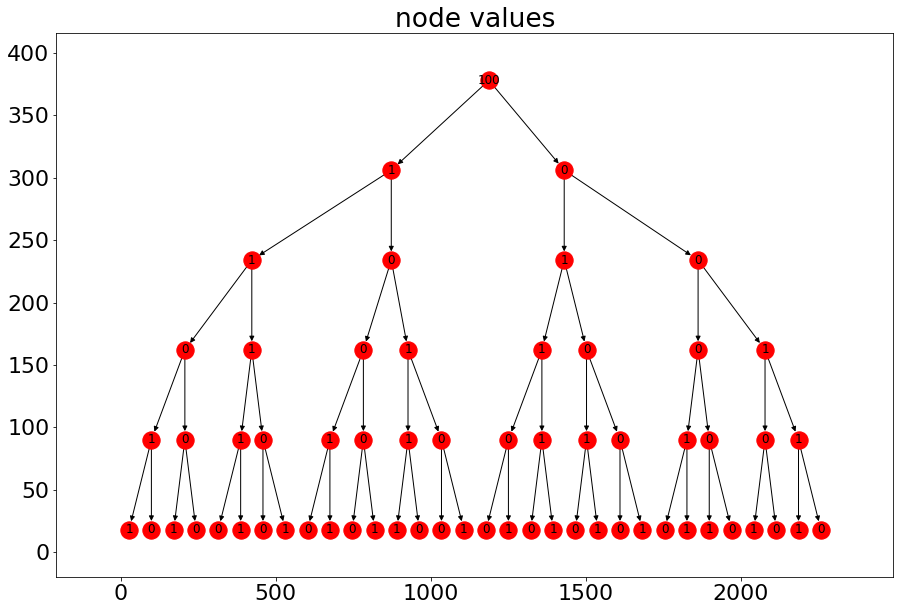

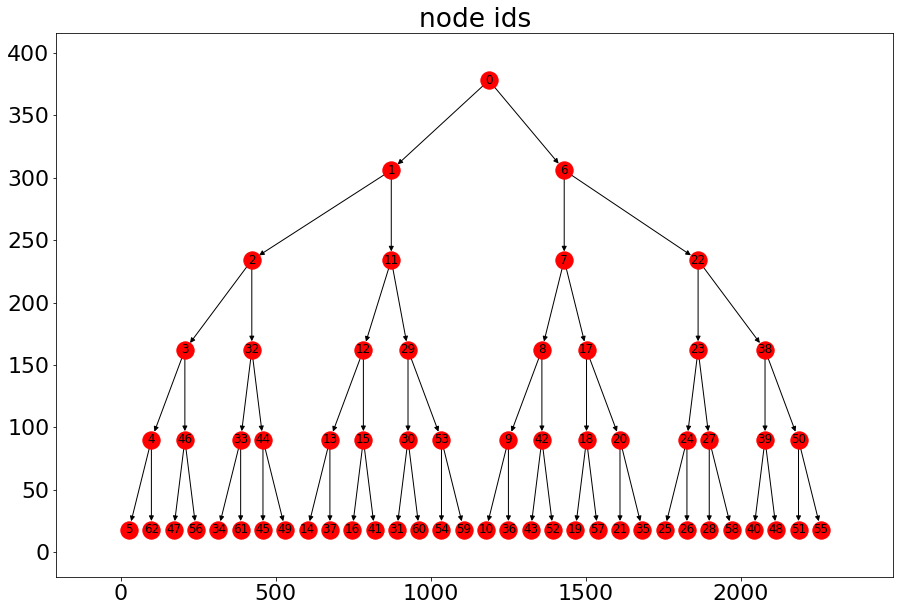

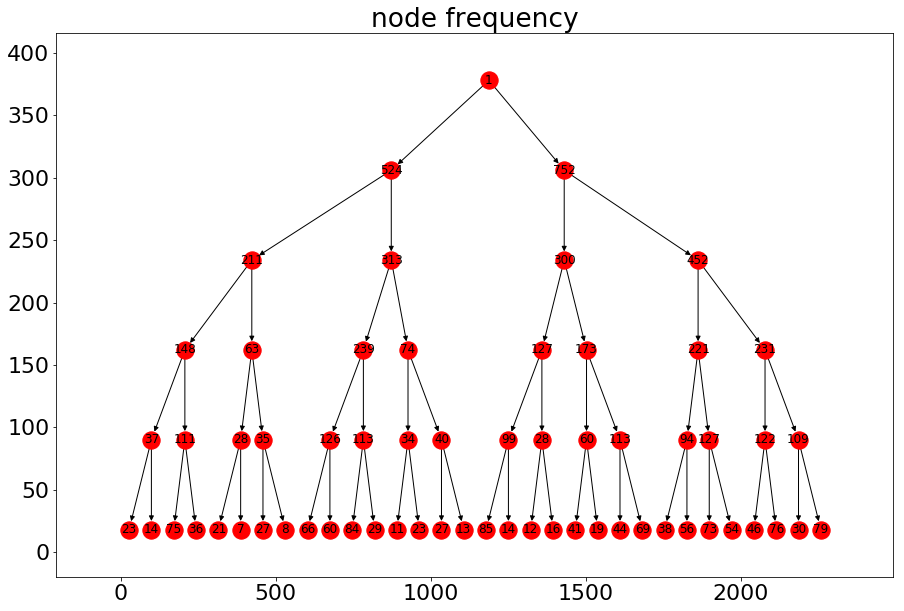

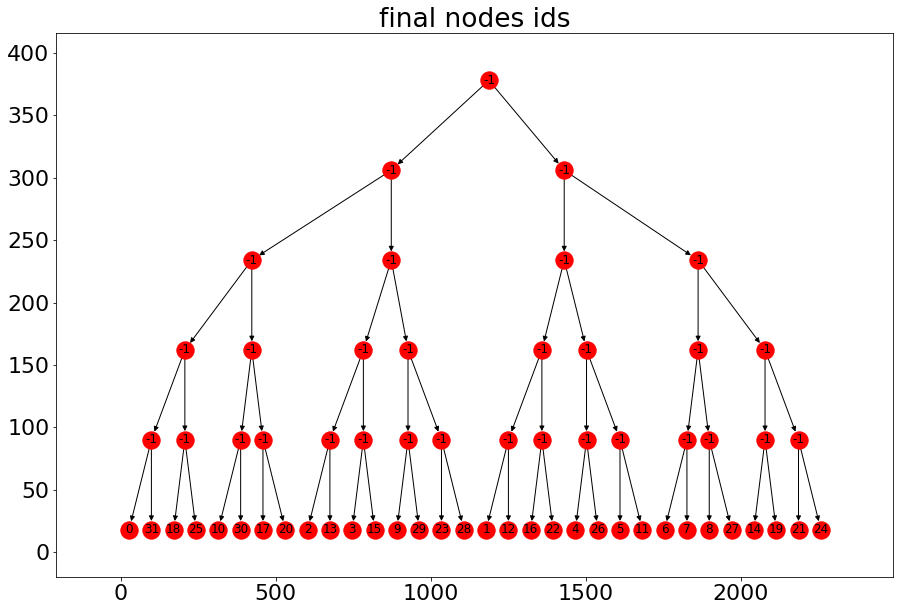

In [13]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})

GG=nx.DiGraph()

counter = 0
GG.add_node(counter, k=100,cc=1, id = -1,food =0)
counter = counter+1
poz = 0
#print(len(data1)/WL)
WL = 5 # window length
overlap = 0# int(WL/5)
step = WL-overlap

for i in range(0,len(data1)-step+1, step):
    #if(data1[i:i+step]==[0,0,1,0] or  data1[i:i+step]==[1,0,0,0] ):
    #    //print(str(i)+ " food")
    poz=0
    for j in range(WL):
        # data
        d=data1[i + j]
        #print(d, end=' ')
        #print (d)
        # neighbours 
        nei= list(GG.neighbors(poz))       
        if len(nei)==0:
            #print (counter, poz, data1[i: i+step])
            GG.add_node(counter,k=d, cc=1, id = -1,food =0)    
            GG.add_edge(poz,counter)
            poz=counter
            counter +=1
        else:
            k=-1
            for n in nei:
                if(GG.node[n]['k']==d):
                    k=n
                    break
            if(k>=0):
                poz=k
                GG.node[k]['cc'] = GG.node[k]['cc'] + 1
            else:
                GG.add_node(counter,k=d,cc=1, id = -1,food =0)    
                GG.add_edge(poz,counter)
                poz=counter
                counter += 1

plt.rcParams['figure.figsize'] = [15, 10]        
labels=dict((n,d['k']) for n,d in GG.nodes(data=True))   
#pos=nx.graphviz_layout(GG, prog='dot')
pos =graphviz_layout(GG, prog='dot')
#nx.spring_layout(GG)

plt.title("node values")
nx.draw_networkx(GG,  pos=pos, arrows=True, with_labels=True, labels=labels )
plt.show()

plt.title("node ids")
nx.draw_networkx(GG,  pos=pos, arrows=True, with_labels=True )
plt.show()

plt.title("node frequency")
labels=dict((n,d['cc']) for n,d in GG.nodes(data=True))   
nx.draw_networkx(GG,  pos=pos, arrows=True, with_labels=True, labels=labels )
plt.show()

finalNodes = [] 
for i in range(1, counter):
    yol =  nx.shortest_path(GG,0,i)
    if(len(yol) >WL):
        GG.node[yol[-1]]['id']=len(finalNodes)
        finalNodes.append(yol[-1])
        
plt.title("final nodes ids")
labels=dict((n,d['id']) for n,d in GG.nodes(data=True))   
nx.draw_networkx(GG,  pos=pos, arrows=True, with_labels=True, labels=labels )
plt.show()    

In [8]:
#plt.hist(a,100)
for i in range(len(b)-1):
    if(b[i]==1 and b[i+1]==2):
        print("food " + str(i))

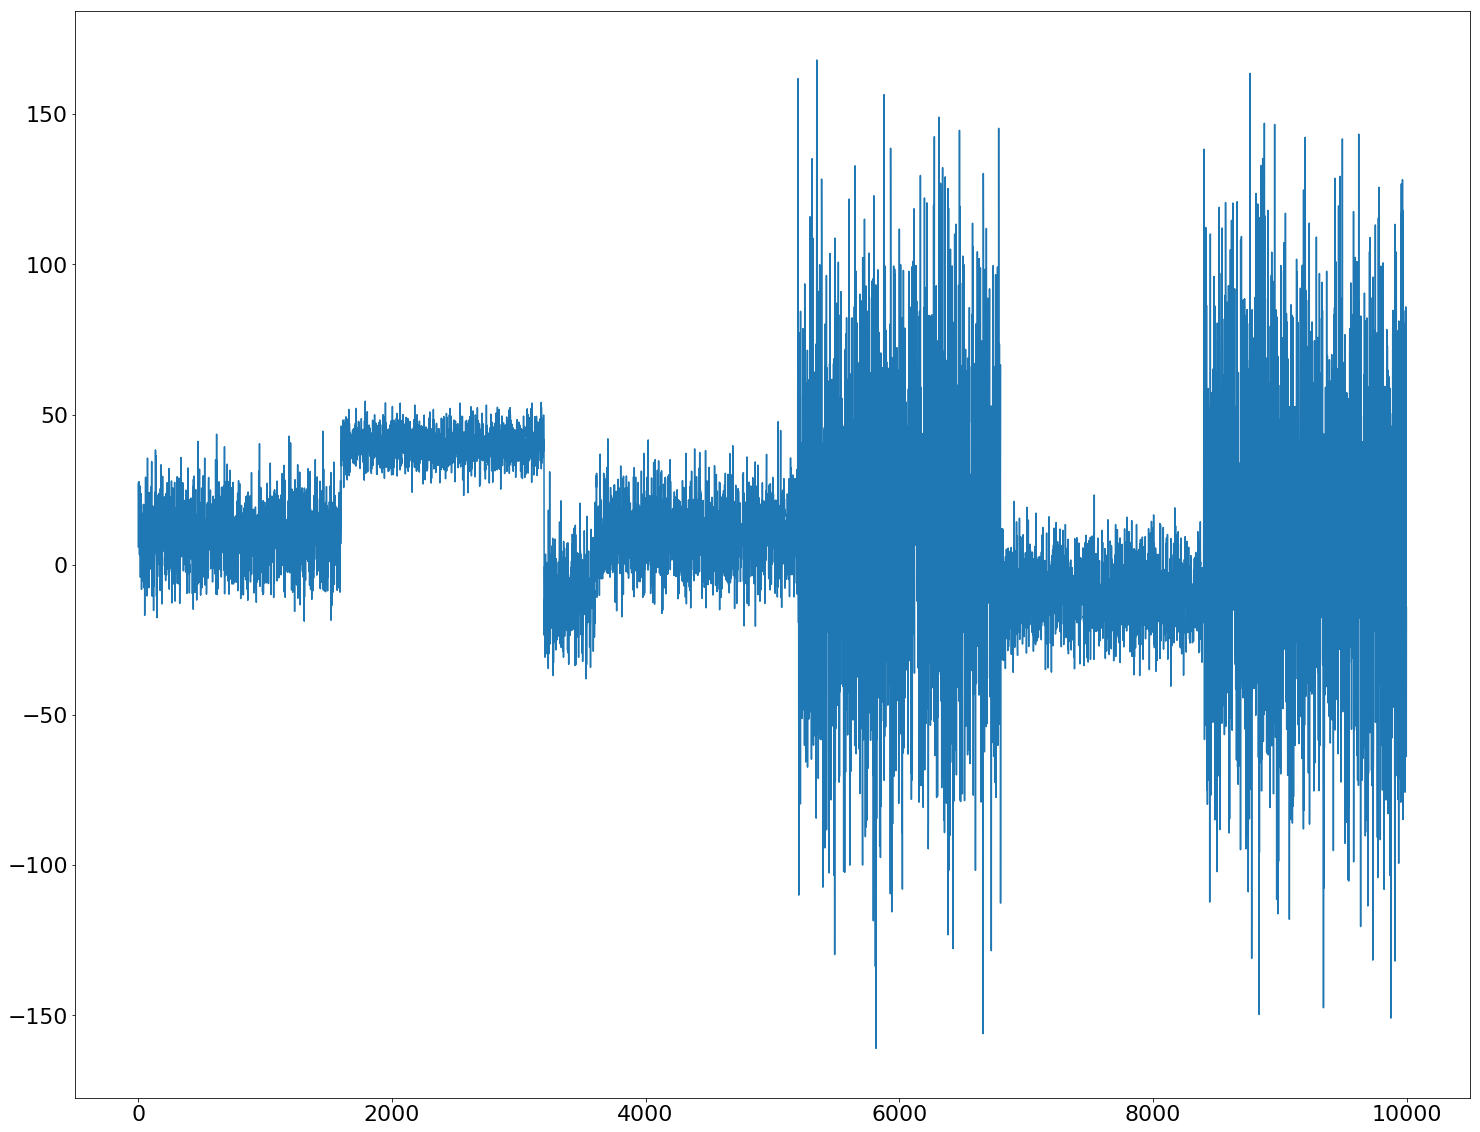

In [69]:
E1 = ["normal", 10, 10]
E2 = ["normal", 40, 5]
E3 = ["normal", -10, 10]
E4 = ["normal", 10, 50]

WS = 8
a= list(genData(E1+[WS*200]))
a= a+list(genData(E2+[WS*200]))
a= a+list(genData(E3+[WS*50]))
a= a+list(genData(E1+[WS*200]))
a= a+list(genData(E4+[WS*200]))

a= a+list(genData(E3+[WS*200]))
a= a+list(genData(E4+[WS*200]))

plt.rcParams['figure.figsize'] = [25, 20]     
plt.plot(a)


In [70]:
from pywt import wavedec
girdi = np.array([1,2,3,4,5,6,7,8])*1

coeffs = wavedec(girdi, 'haar', level=int(np.log2(len(girdi))))
print(coeffs)
girdi = girdi*1.5

coeffs = wavedec(girdi, 'haar', level=int(np.log2(len(girdi))))
print(coeffs)
print("ortalama = ", np.mean(girdi))
print("std = " , np.std(girdi))

merged_list = []

for l in coeffs:
    merged_list += list(l)
print(merged_list)

[array([12.72792206]), array([-5.65685425]), array([-2., -2.]), array([-0.70710678, -0.70710678, -0.70710678, -0.70710678])]
[array([19.09188309]), array([-8.48528137]), array([-3., -3.]), array([-1.06066017, -1.06066017, -1.06066017, -1.06066017])]
ortalama =  6.75
std =  3.43693177121688
[19.091883092036788, -8.485281374238571, -3.0000000000000004, -3.0, -1.0606601717798214, -1.0606601717798214, -1.0606601717798219, -1.0606601717798219]


In [71]:
from pywt import wavedec
b= [] 
for i in range(int(len(a)/WS)-1):
    girdi = a[i*WS:(i+1)*WS]
    coeffs = wavedec(girdi, 'haar', level=int(np.log2(len(girdi))))
    merged_list = []
    for l in coeffs:
        merged_list += list(l)
    b = b+merged_list

b = [ '%.2f' % elem for elem in b ]
b = [ float( elem )for elem in b ]

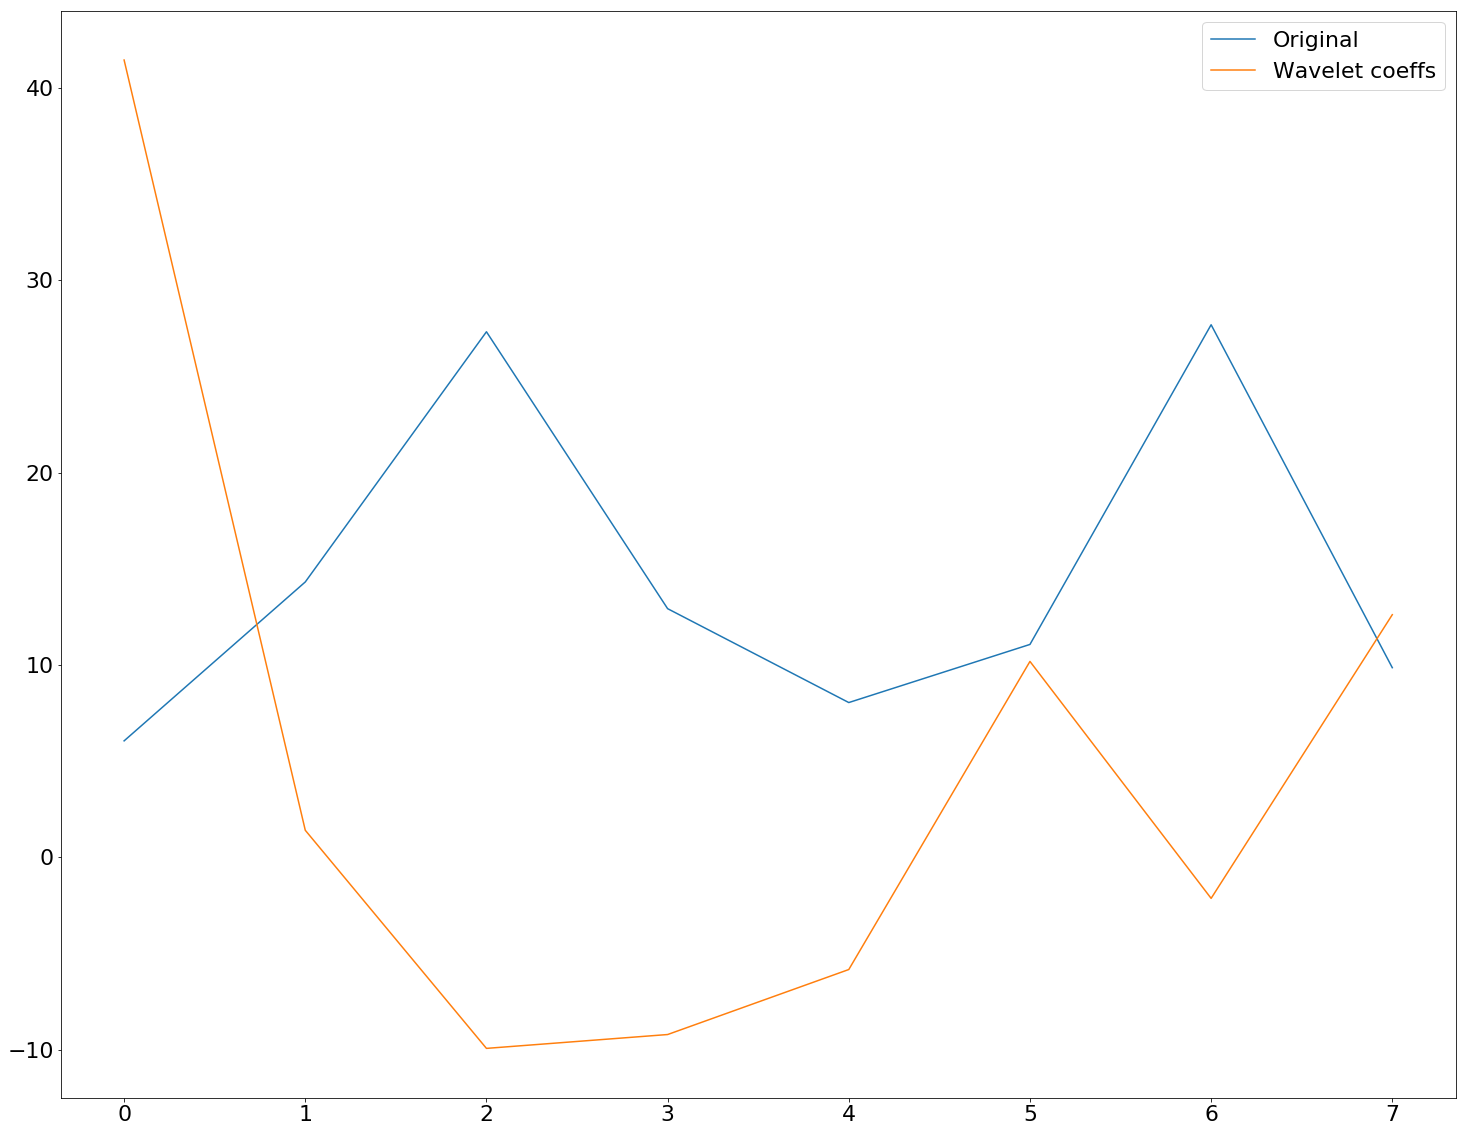

In [72]:
plt.plot(a[:WS], label='Original')
plt.plot(b[:WS], label='Wavelet coeffs')
plt.legend()

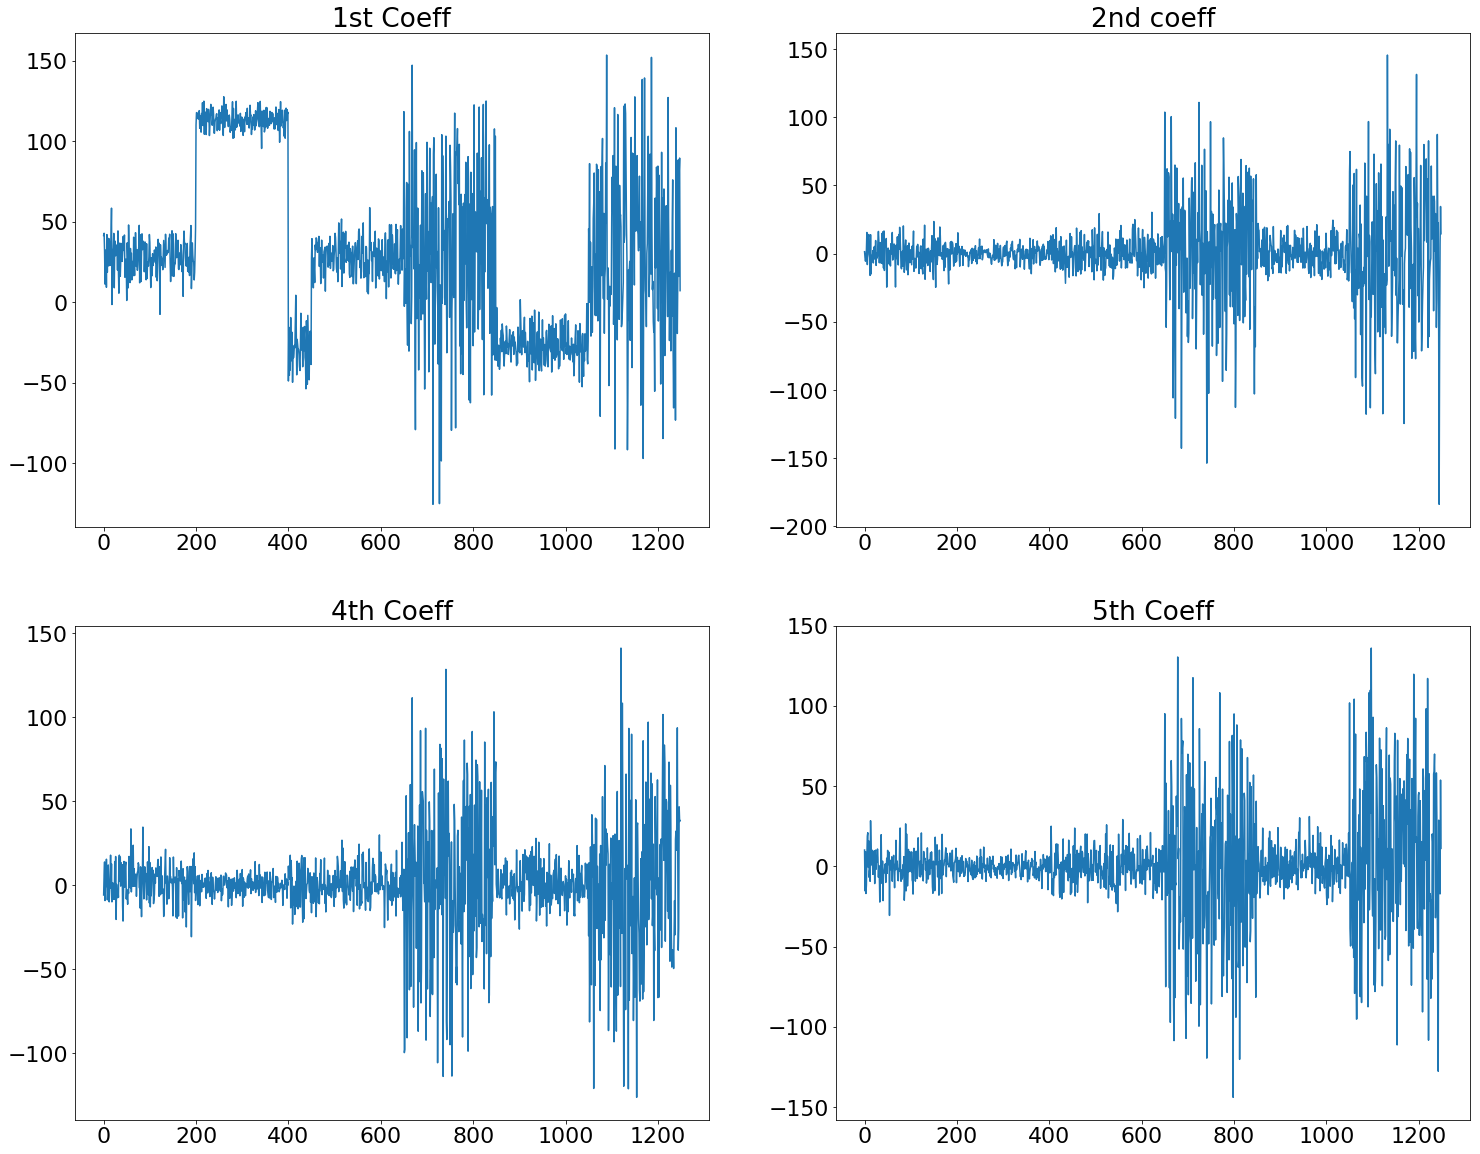

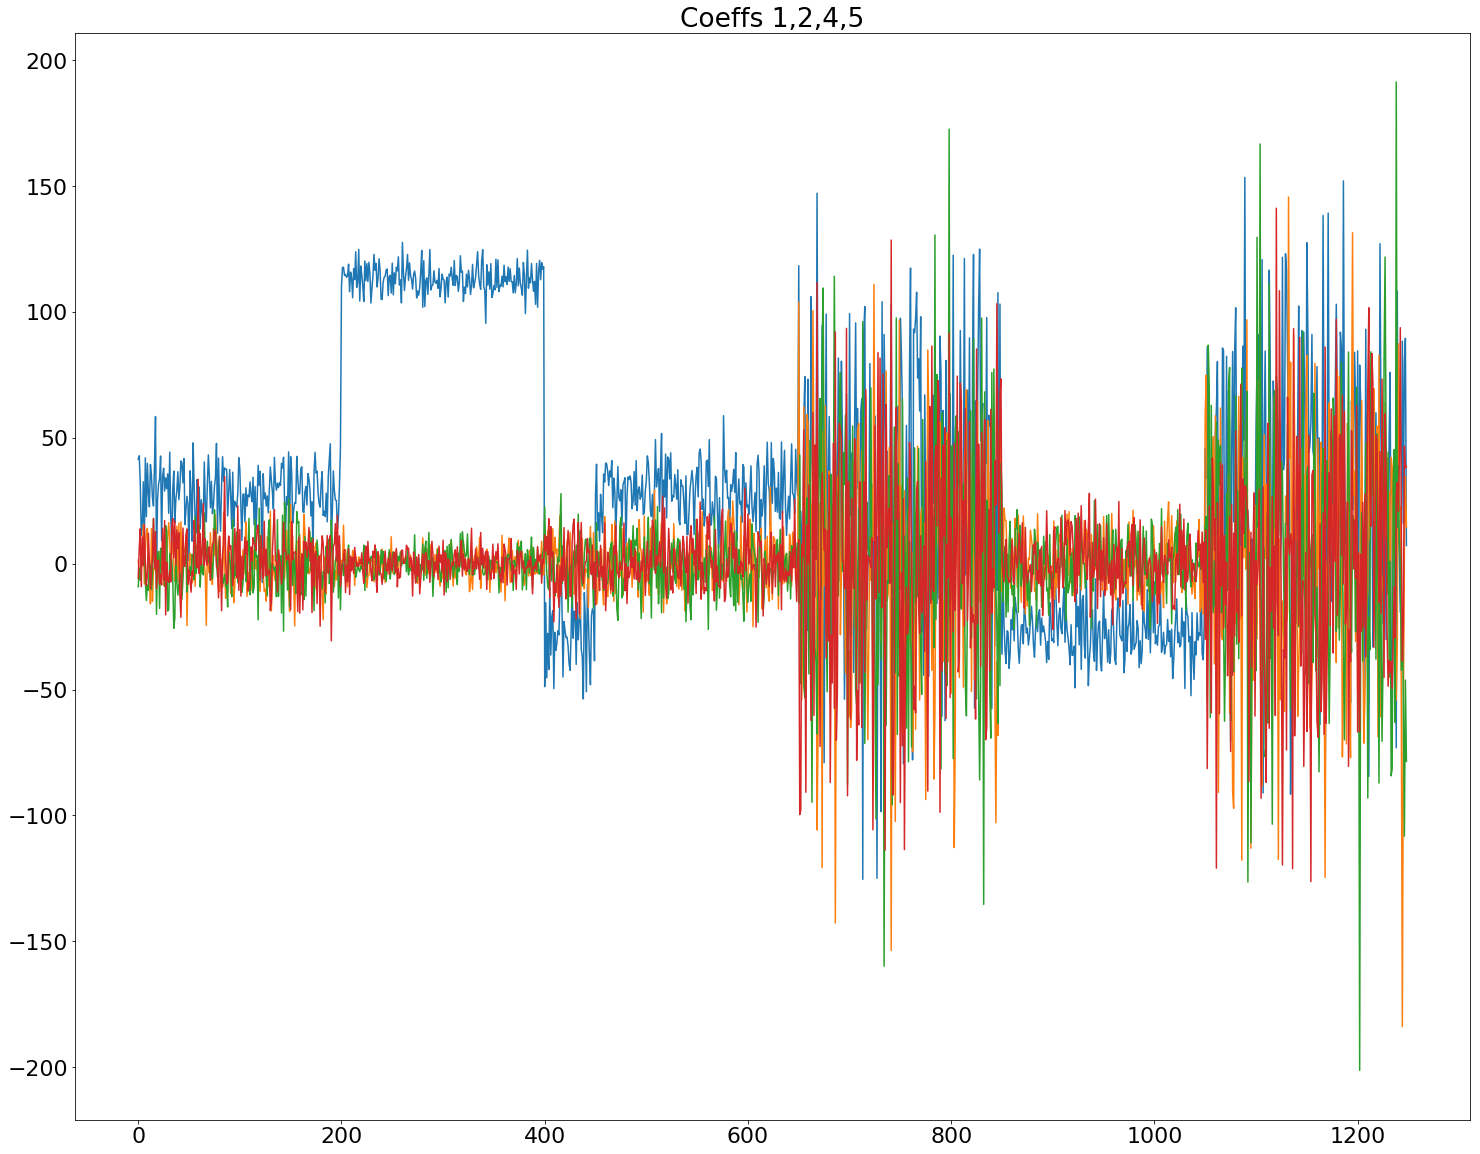

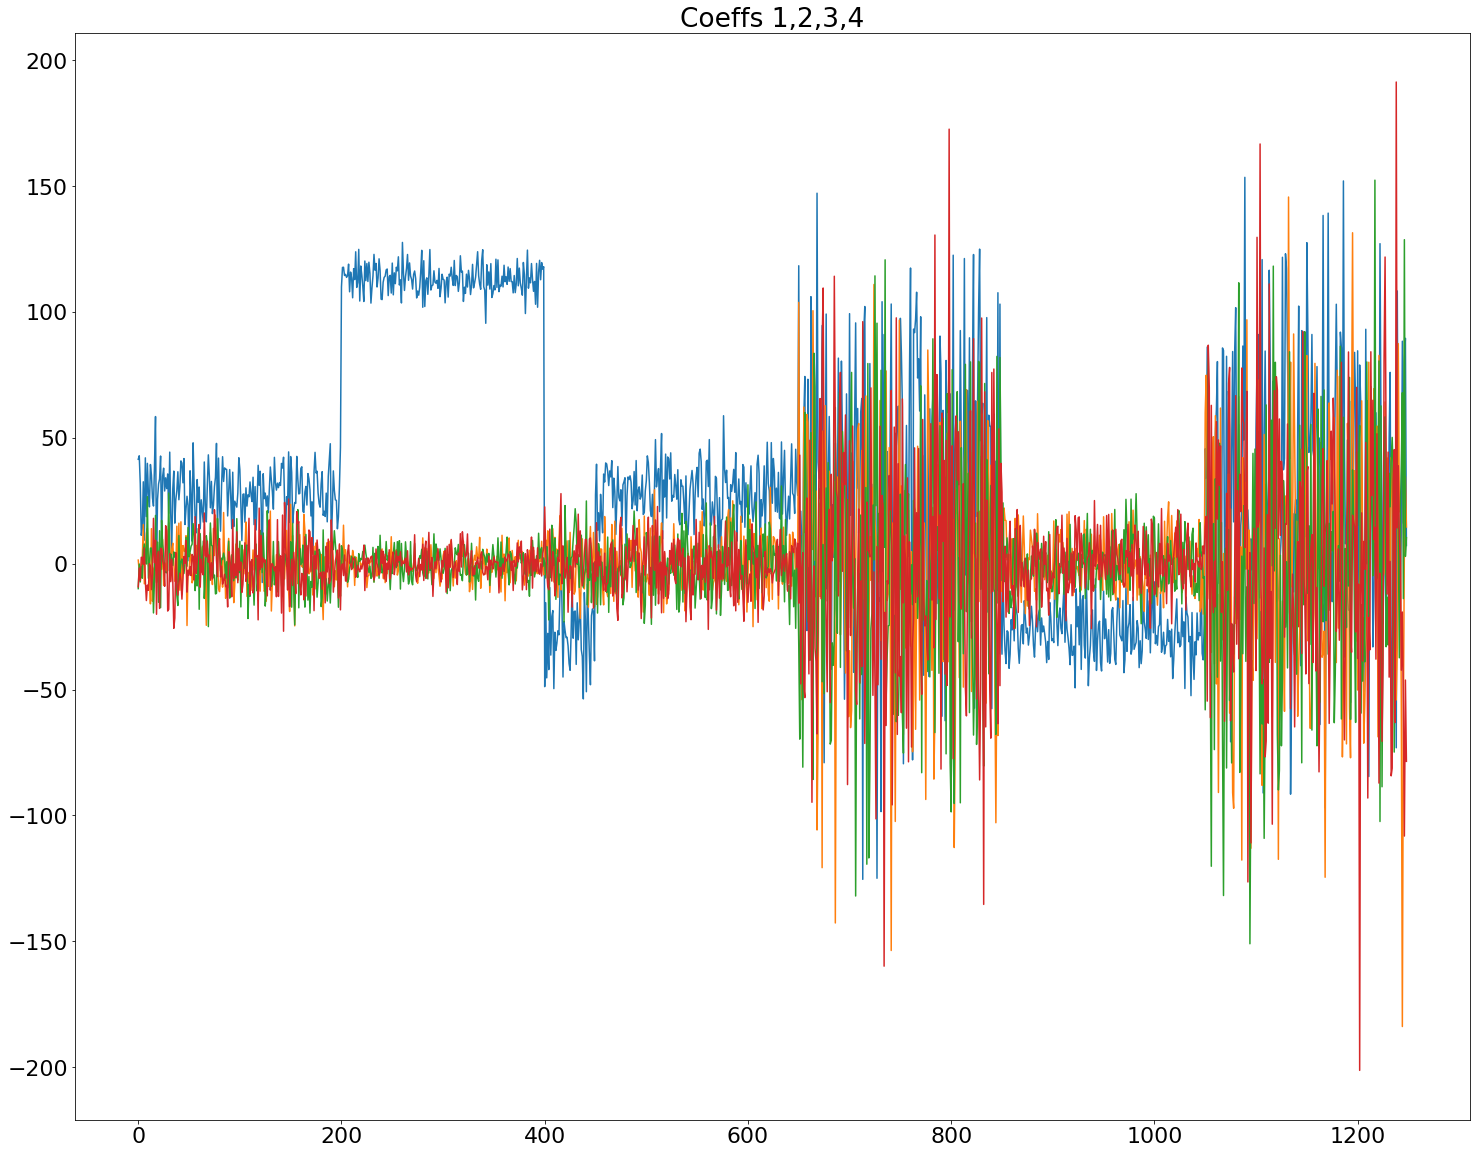

In [73]:
#print(b[:10])
#print(b[0::8])
#print(b[1::8])
plt.rcParams['figure.figsize'] = [25, 20]     
plt.plot(b[1::8])

# plot with various axes scales
plt.figure(1)

# linear
plt.subplot(221)
plt.plot(b[0::8])
plt.title("1st Coeff")


# log
plt.subplot(222)
plt.plot(b[1::8])
plt.title("2nd coeff")

# symmetric log
plt.subplot(223)
plt.plot(b[4::8])
plt.title("4th Coeff")
# logit
plt.subplot(224)
plt.plot(b[5::8])
plt.title("5th Coeff")
plt.show()        

plt.title("Coeffs 1,2,4,5")
plt.plot(b[0::8])
plt.plot(b[1::8])
plt.plot(b[3::8])
plt.plot(b[4::8])

plt.show()
plt.title("Coeffs 1,2,3,4")
plt.plot(b[0::8])
plt.plot(b[1::8])
plt.plot(b[2::8])
plt.plot(b[3::8])        

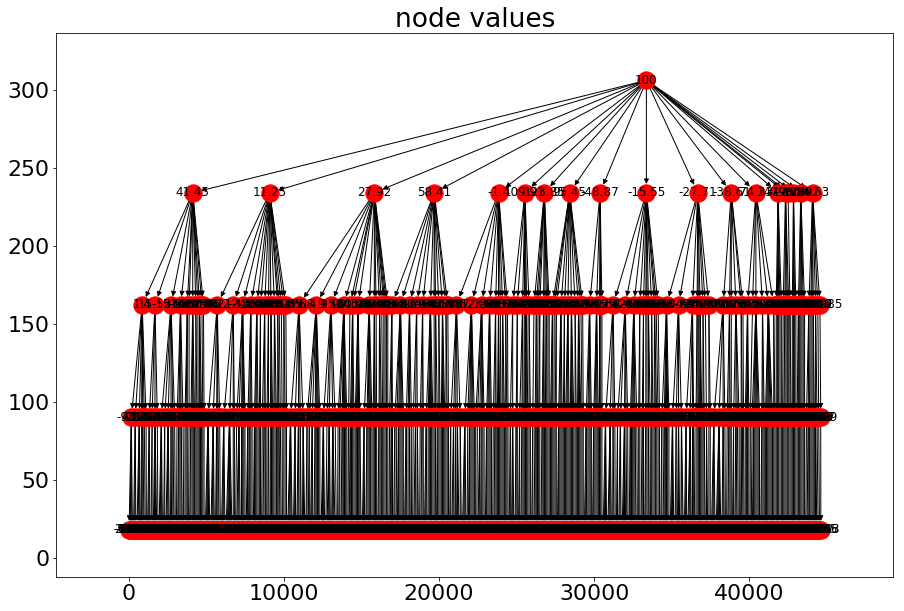

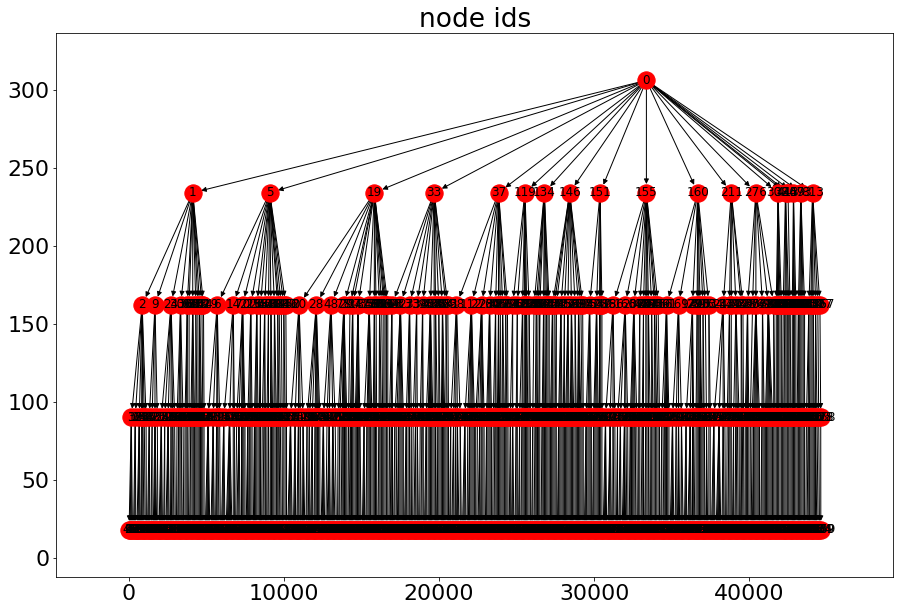

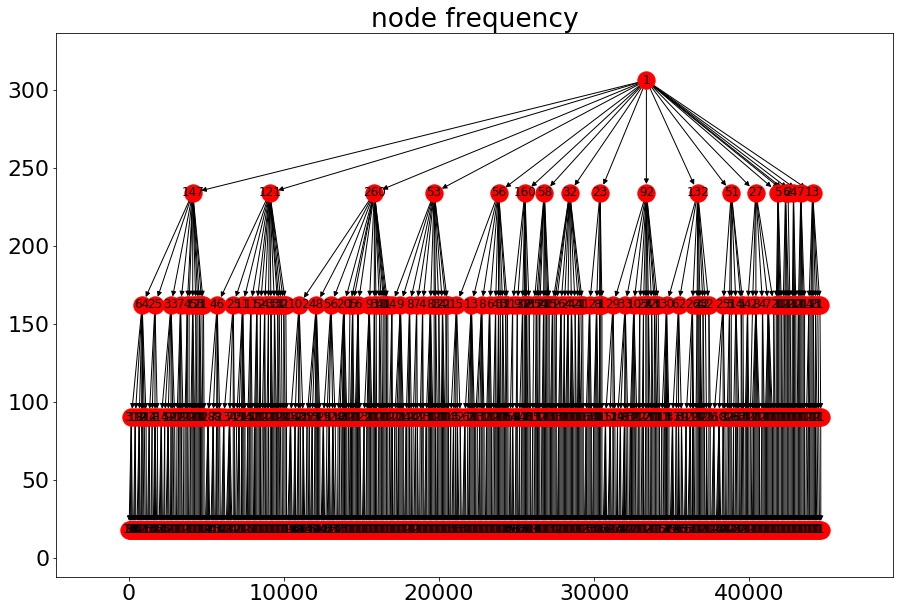

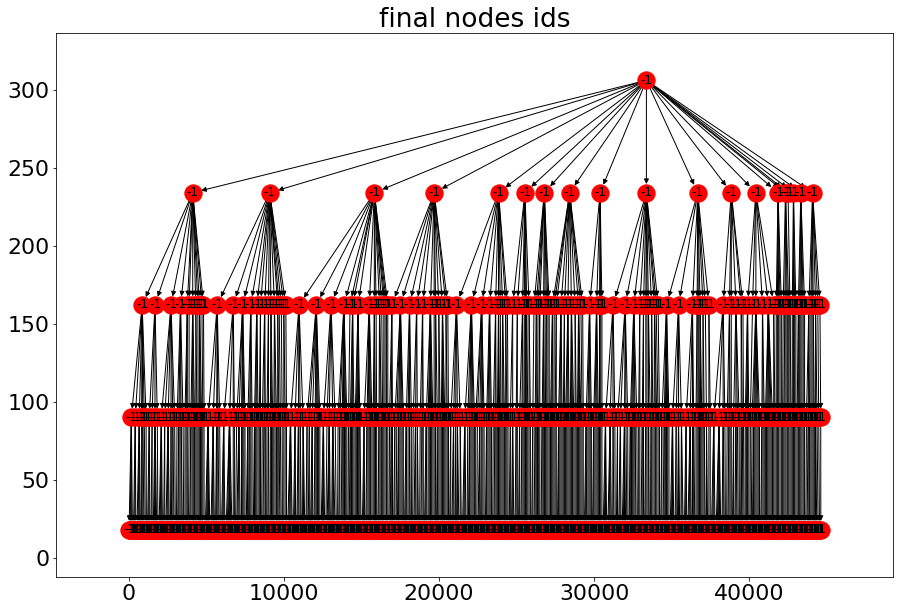

In [74]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})
data1 = b

finalNodes1 = []

GG=nx.DiGraph()

counter = 0
GG.add_node(counter, k=100,cc=1, id = -1,food =0)
counter = counter+1
poz = 0
#print(len(data1)/WL)
WL = 8 # window length
overlap = 0# int(WL/5)
step = WL-overlap
treeLen = 4

for i in range(0,len(data1)-step+1, step):
    #if(data1[i:i+step]==[0,0,1,0] or  data1[i:i+step]==[1,0,0,0] ):
    #    //print(str(i)+ " food")
    #print( data1[i:i+WL])
    #print( ("elements in the list are ["+', '.join(['%.2f']*len(data1[i:i+WL]))+"]") % tuple(data1[i:i+WL]))  
    poz=0
    for j in range(treeLen):
        # data
        d=data1[i + j]
        #print(d, end=' ')
        #print (d)
        # neighbours 
        nei= list(GG.neighbors(poz))  
           
        closestMatch= -1
        closestDist = 10
        #print(nei)
        for k in range(len(nei)):            
            #print (i/WL,k,d, nei[k], GG.node[nei[k]]['k'])
            if( abs(GG.node[nei[k]]['k'] - d)  < closestDist ) :
                closestMatch = nei[k]
                closestDist = abs(GG.node[nei[k]]['k'] - d)
        #print("closest match = " , closestMatch, closestDist)
        
        
            
        #if len(nei)==0:
        if(closestMatch==-1):
            #print (counter, poz, data1[i: i+step])
            GG.add_node(counter,k=d, cc=1, id = -1,food =0)    
            GG.add_edge(poz,counter)
            poz=counter
            counter +=1
        else:            
            k=closestMatch
            if(k>=0):
                poz=k
                GG.node[k]['cc'] = GG.node[k]['cc'] + 1
                
                #print("yol = ", poz)
            else:
                GG.add_node(counter,k=d,cc=1, id = -1,food =0)    
                GG.add_edge(poz,counter)
                poz=counter
                counter += 1
        if(j==2):
            finalNodes1.append(poz)

plt.rcParams['figure.figsize'] = [15, 10]        
labels=dict((n,d['k']) for n,d in GG.nodes(data=True))   
#pos=nx.graphviz_layout(GG, prog='dot')
pos =graphviz_layout(GG, prog='dot')
#nx.spring_layout(GG)

plt.title("node values")
nx.draw_networkx(GG,  pos=pos, arrows=True, with_labels=True, labels=labels )
plt.show()

plt.title("node ids")
nx.draw_networkx(GG,  pos=pos, arrows=True, with_labels=True )
plt.show()

plt.title("node frequency")
labels=dict((n,d['cc']) for n,d in GG.nodes(data=True))   
nx.draw_networkx(GG,  pos=pos, arrows=True, with_labels=True, labels=labels )
plt.show()

finalNodes = [] 
for i in range(1, counter):
    yol =  nx.shortest_path(GG,0,i)
    if(len(yol) >WL):
        GG.node[yol[-1]]['id']=len(finalNodes)
        finalNodes.append(yol[-1])
        
plt.title("final nodes ids")
labels=dict((n,d['id']) for n,d in GG.nodes(data=True))   
nx.draw_networkx(GG,  pos=pos, arrows=True, with_labels=True, labels=labels )
plt.show()    

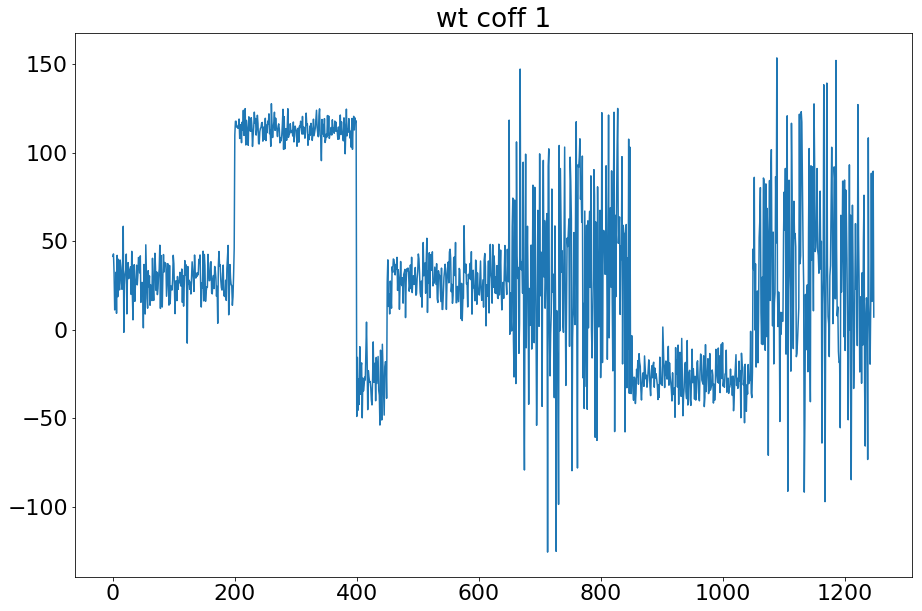

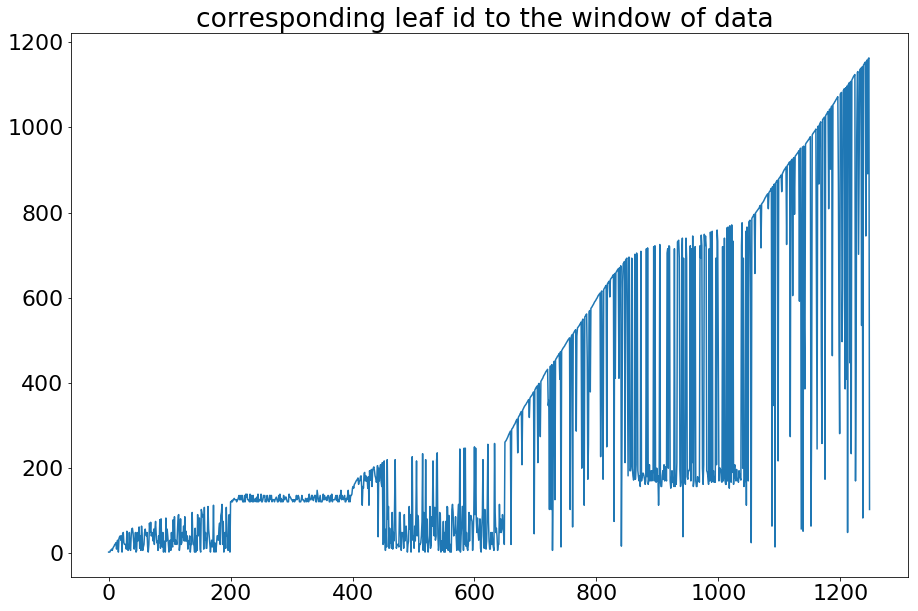

In [77]:
plt.title("wt coff 1")
plt.plot(b[0::8])
plt.show()
plt.title("corresponding leaf id to the window of data ")
plt.plot(finalNodes1)


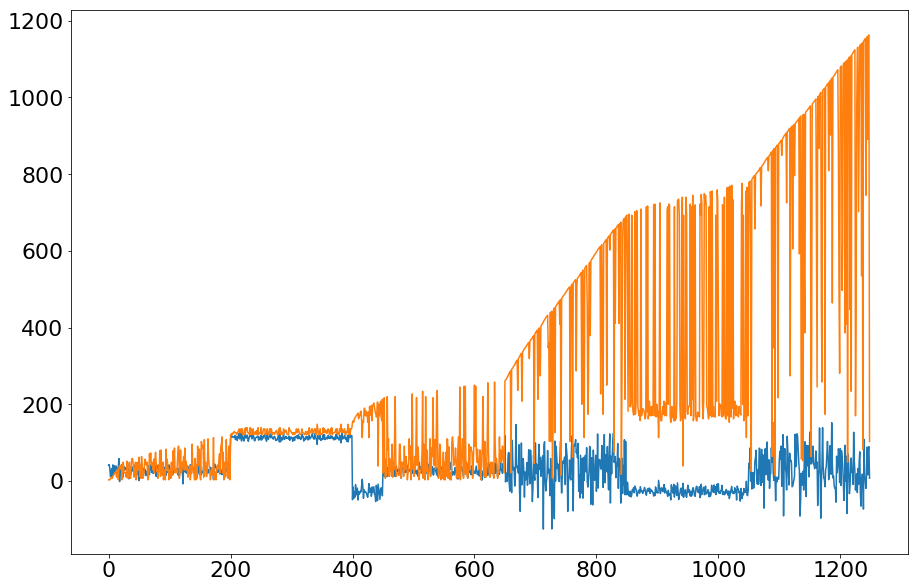

In [76]:
plt.plot(b[0::8])

plt.plot(finalNodes1)

# Signal Generation

In [3]:
signalCount=16
signals = [] 


    
    
    

In [31]:
signals = [] 

for i in range(signalCount):
    a = genData(["normal", 100,100,8])
    #print(a)
    sig = [] 
    for j in range(8):
        sig.append(int(a[j]))
    signals.append(sig)
for i in range(signalCount):
    print(signals[i])


[64, 238, -85, 82, 18, 116, 23, 198]
[9, 79, 117, 87, 190, 157, 164, 60]
[285, 145, -201, -7, 42, 112, 50, 120]
[-24, 129, 47, 1, 113, 194, 103, 208]
[191, 146, -9, 111, 84, 187, 84, -139]
[175, 177, 114, 76, 42, 0, 188, -108]
[220, 131, 154, 114, 122, 102, 19, 103]
[109, 128, 107, 13, 131, 98, 49, 300]
[224, 115, 59, 10, 62, 130, -143, 214]
[212, 207, 62, -74, 20, 13, 178, 25]
[76, 101, 210, 143, 29, 141, 41, 48]
[68, 97, 21, -20, 66, 204, 86, -38]
[239, 37, -14, 156, 216, 172, 221, 235]
[96, 167, 221, 56, 170, 134, 15, 50]
[112, 61, 171, 130, 33, 110, 89, 19]
[83, 68, -61, 160, 82, -35, 131, 114]


In [32]:
testdata = list(set(tuple(x) for x in signals))

In [33]:
print(len(signals))
print(len(testdata))
merged_list = []

for l in signals:
    merged_list += list(l)

16
16


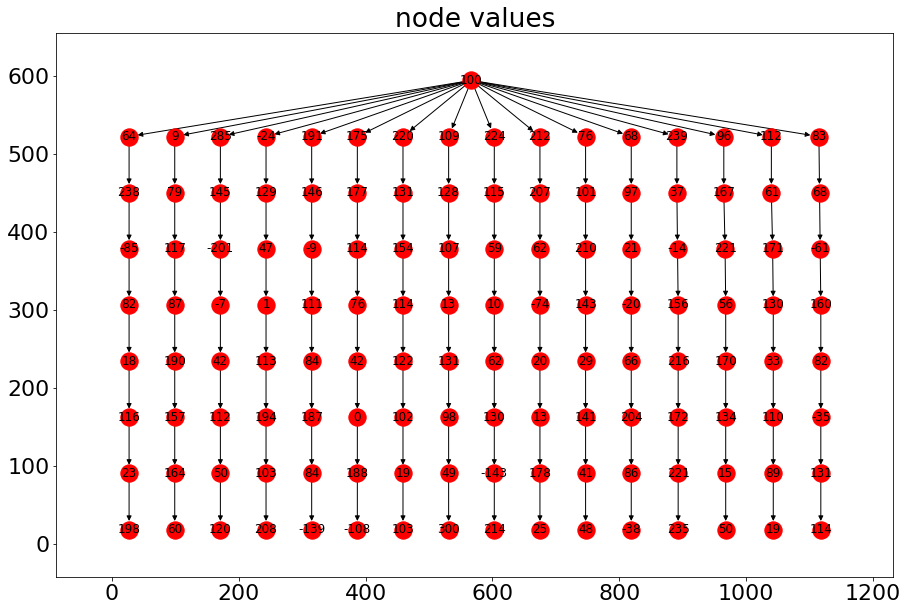

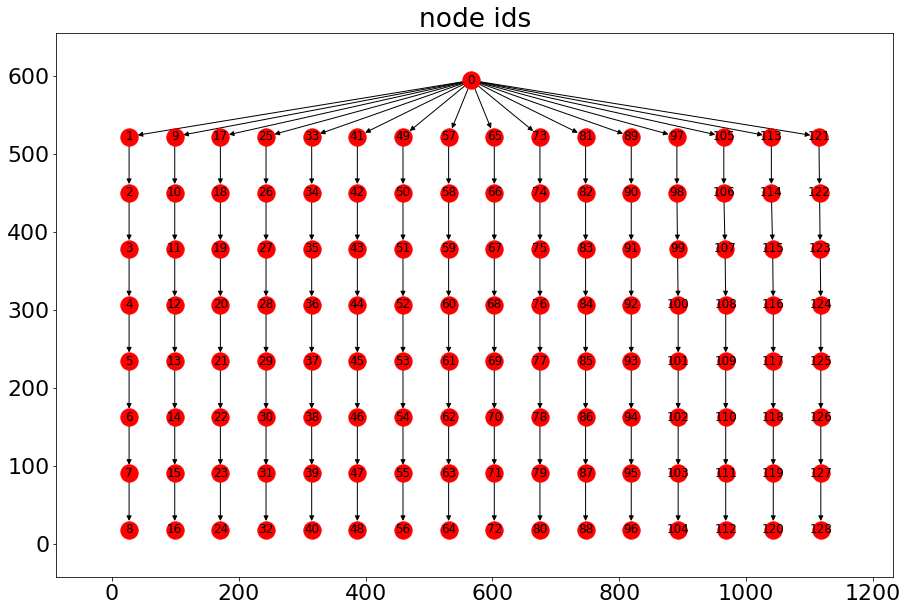

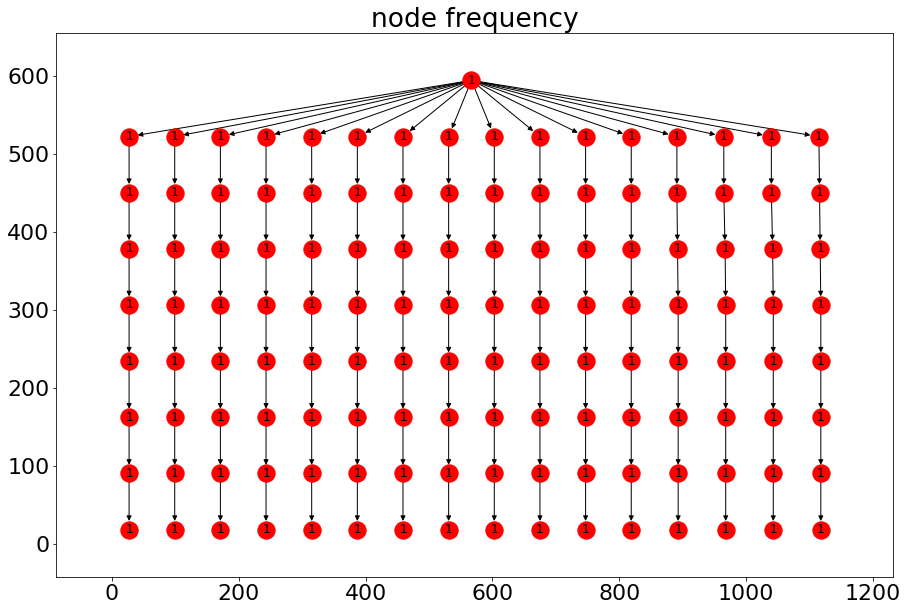

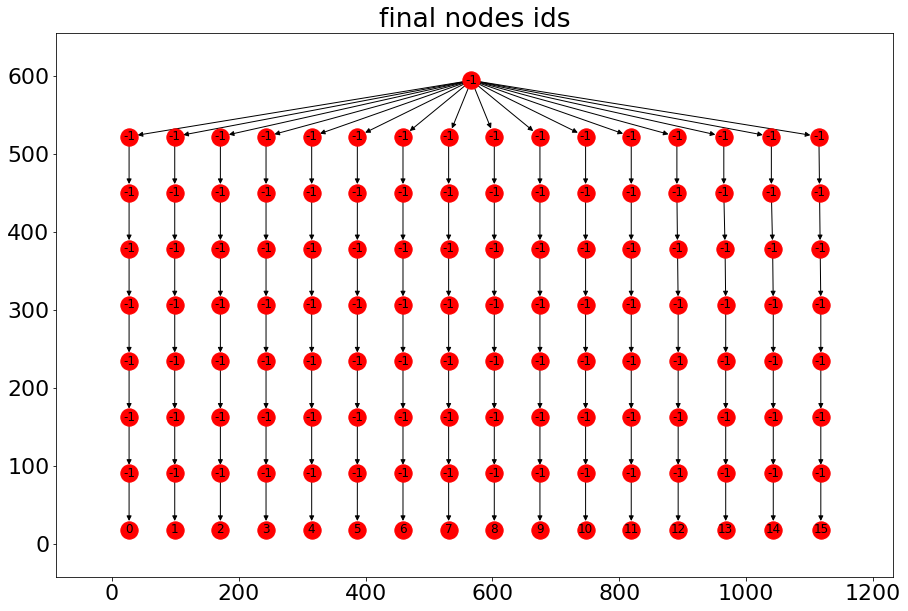

In [34]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})
data1 = merged_list
GG=nx.DiGraph()

counter = 0
GG.add_node(counter, k=100,cc=1, id = -1,food =0)
counter = counter+1
poz = 0
#print(len(data1)/WL)
WL = 8 # window length
overlap = 0# int(WL/5)
step = WL-overlap

for i in range(0,len(data1)-step+1, step):
    #if(data1[i:i+step]==[0,0,1,0] or  data1[i:i+step]==[1,0,0,0] ):
    #    //print(str(i)+ " food")
    poz=0
    for j in range(WL):
        # data
        d=data1[i + j]
        #print(d, end=' ')
        #print (d)
        # neighbours 
        nei= list(GG.neighbors(poz))       
        if len(nei)==0:
            #print (counter, poz, data1[i: i+step])
            GG.add_node(counter,k=d, cc=1, id = -1,food =0)    
            GG.add_edge(poz,counter)
            poz=counter
            counter +=1
        else:
            k=-1
            for n in nei:
                if(GG.node[n]['k']==d):
                    k=n
                    break
            if(k>=0):
                poz=k
                GG.node[k]['cc'] = GG.node[k]['cc'] + 1
            else:
                GG.add_node(counter,k=d,cc=1, id = -1,food =0)    
                GG.add_edge(poz,counter)
                poz=counter
                counter += 1

plt.rcParams['figure.figsize'] = [15, 10]        
labels=dict((n,d['k']) for n,d in GG.nodes(data=True))   
#pos=nx.graphviz_layout(GG, prog='dot')
pos =graphviz_layout(GG, prog='dot')
#nx.spring_layout(GG)

plt.title("node values")
nx.draw_networkx(GG,  pos=pos, arrows=True, with_labels=True, labels=labels )
plt.show()

plt.title("node ids")
nx.draw_networkx(GG,  pos=pos, arrows=True, with_labels=True )
plt.show()

plt.title("node frequency")
labels=dict((n,d['cc']) for n,d in GG.nodes(data=True))   
nx.draw_networkx(GG,  pos=pos, arrows=True, with_labels=True, labels=labels )
plt.show()

finalNodes = [] 
for i in range(1, counter):
    yol =  nx.shortest_path(GG,0,i)
    if(len(yol) >WL):
        GG.node[yol[-1]]['id']=len(finalNodes)
        finalNodes.append(yol[-1])
        
plt.title("final nodes ids")
labels=dict((n,d['id']) for n,d in GG.nodes(data=True))   
nx.draw_networkx(GG,  pos=pos, arrows=True, with_labels=True, labels=labels )
plt.show()    

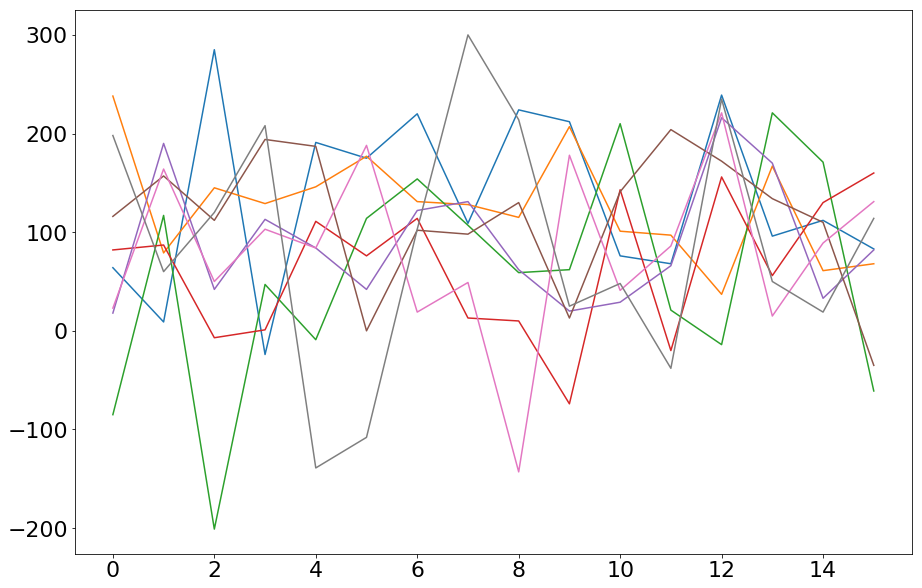

In [35]:
plt.plot(signals)